<a href="https://colab.research.google.com/github/chanchalagrawal0107/House-Price-Prediction-Project/blob/main/House_Price_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction using Linear, Multiple and Polynomial Regression**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.datasets import fetch_california_housing
cal = fetch_california_housing()
data = pd.DataFrame(cal.data, columns = cal.feature_names)
data['MedHouseValue'] = cal.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
2

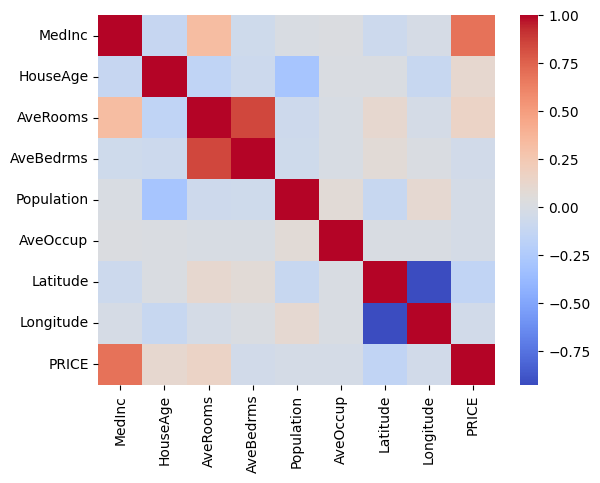

In [6]:
#EDA
print(data.info())
print(data.describe())

# heatmap is used to identify ki which feature has strong correlation with the
# target(price)
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')           #annot = True correlation ke numbers likh deta hai, agar +1 hai toh it is highly positive, 0 means no correlation and -1 means highly negative
plt.show()

*Simple Linear Regression*

R2 score:  0.45885918903846656
Mean squared error:  0.7091157771765549


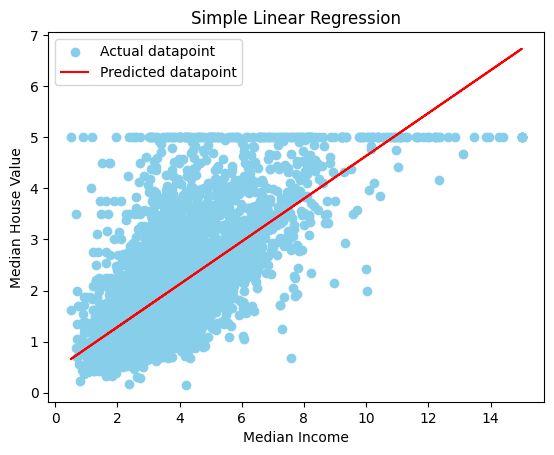

In [9]:
X = data[['MedInc']]
y = data['MedHouseValue']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))

plt.scatter(X_test, y_test, color = 'skyblue', label = 'Actual datapoint')
plt.plot(X_test, y_pred, color = 'red', label = 'Predicted datapoint')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

*Multiple Linear Regression*

In [10]:
x = data.drop('MedHouseValue', axis = 1)
y = data['MedHouseValue']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.45885918903846656
0.7091157771765549


*Polynomial Linear Regression*

In [11]:
X = data[['MedInc']]
y = data['MedHouseValue']

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(x_poly, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))


0.46331772769346236
0.7032732680932143
